In [1]:
import importlib,sys,local_utils
from local_utils import *

# La Damier de Pascal

## Origine du projet

Ce dépôt présente mon travail sur une conjecture liant les propriétés du triangle de Pascal et les nombres premiers.

Ce travail part d'une observation faite en Avril 2025  à l'occasion de la préparation du Grand Oral des épreuves du baccalauréat 2025, lors d'un cours de NSI.

## Exemple de construction du Damier de Pascal

Si on prend le [triangle de Pascal](https://fr.wikipedia.org/wiki/Triangle_de_Pascal) formé par ses $N$ premières lignes (d'indice compris entre 0 et $N{-}1$),
- qu'on aligne toutes les lignes du triangle sur la gauche d'une matrice, 
- qu'on symétrise la triangulaire inférieure de la matrice,  

on obtient la matrice $A$ suivante (prise à titre d'exemple ici pour $N=5$)

$$A=
\left(\begin{array}{cccccc}
1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 0 & 0\\
1 & 2 & 1 & 0 & 0\\
1 & 3 & 3 & 1 & 0\\
1 & 4 & 6 & 4 & 1\\
\end{array}\right)
+
\left(\begin{array}{cccccc}
0 & 1 & 1 & 1 & 1\\
0 & 0 & 2 & 3 & 4\\
0 & 0 & 0 & 3 & 6\\
0 & 0 & 0 & 0 & 4\\
0 & 0 & 0 & 0 & 0\\
\end{array}\right)
=
\left(\begin{array}{cccccc}
1 & 1 & 1 & 1 & 1\\
1 & 1 & 2 & 3 & 4\\
1 & 2 & 1 & 3 & 6\\
1 & 3 & 3 & 1 & 4\\
1 & 4 & 6 & 4 & 1\\
\end{array}\right)
$$


On crée ensuite une matrice B en inversant l'ordre des lignes du triangle de Pascal, puis en alignant le triangle de Pascal sur la droite cette fois, (i.e. de manière équivalente  une rotation de 180°), avant de symétriser le triangle opposée.

$$B=
\left(
\begin{array}{cccccc}
1 & 4 & 6 & 4 & 1\\
0 & 1 & 3 & 3 & 1\\
0 & 0 & 1 & 2 & 1\\
0 & 0 & 0 & 1 & 1\\
0 & 0 & 0 & 0 & 1\\
\end{array}
\right)
+
\left(\begin{array}{cccccc}
0 & 0 & 0 & 0 & 0\\
4 & 0 & 0 & 0 & 0\\
6 & 3 & 0 & 0 & 0\\
4 & 3 & 2 & 0 & 0\\
1 & 1 & 1 & 1 & 0\\
\end{array}\right)
=\left(
\begin{array}{cccccc}
1 & 4 & 6 & 4 & 1\\
4 & 1 & 3 & 3 & 1\\
6 & 3 & 1 & 2 & 1\\
4 & 3 & 2 & 1 & 1\\
1 & 1 & 1 & 0 & 1\\
\end{array}\right)
$$

On définit la matrice $S$, comme la somme de la matrice $A$ et de la matrice $B$

$$
S=A+B=
\left(
\begin{array}{cccccc}
2 & 5 & 7 & 5 & 2\\
5 & 2 & 5 & 6 & 5\\
7 & 5 & 2 & 5 & 7\\
5 & 6 & 5 & 2 & 5\\
2 & 5 & 7 & 5 & 2\\
\end{array}
\right)
$$

On construit la matrice D, remplie de 0 et de 1 en appliquant la règle suivante.

L'élément $D_{i,j}$ (ligne $i$, colonne $j$) égale 0 si $S_{i,j}$ est une multiple du $N$, et $D_{i,j}=1$ sinon.

$$D=
\left(
\begin{array}{cccccc}
1 & 0 & 1 & 0 & 1\\
0 & 1 & 0 & 1 & 0\\
1 & 0 & 1 & 0 & 1\\
0 & 1 & 0 & 1 & 0\\
1 & 0 & 1 & 0 & 1\\
\end{array}
\right)
$$

Si on représente cette matrice sous la forme d'une image dont les pixels sont noirs si $D_{i,j}=0$ et blancs sinon, on constate que l'image associée représente un Damier régulier pour $N=5$.

On peut utiliser la fonction `AffichageDamierPascal` qui prend par défaut la valeur de $N$.

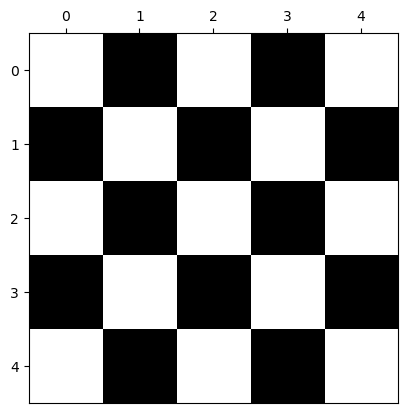

In [4]:
AffichageDamierPascal(5)

Pour $N=14$, on obtient l'image suivante qui ne forme pas un Damier régulier comme on peut le voir sur l'image suivante.

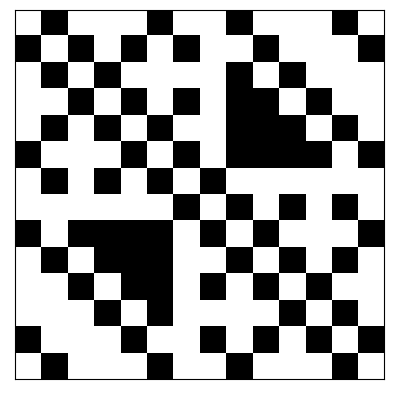

In [5]:
AffichageDamierPascal(14)


## Conjecture du Damier de Pascal

### Définition du Damier de Pascal

On note $\binom{n}{k}$ le coefficient binomial défini par $\frac{n!}{k!(n-k)!}$ 

En généralisant les règles de constructions précédentes, on cherche $S_{i,j}$, l'élément correspondant à la ligne $i$ et la colonne $j$ de la matrice $S=A+B$, avec $i$ et $j$ des entiers compris entre 0 et $Z=N-1$ (compris).

On remarque tout d'abord que par construction, $S_{i,j}=S_{j,i}$

Puis pour $j\leq i$, on obtient l'expression de $S_{i,j}$ qui apparait comme la somme de deux coefficients binomiaux du triangle de Pascal.

$$S_{i,j}=\binom{i}{j}+\binom{Z{-}j}{Z{-}i}=\binom{i}{j}+\binom{Z{-}j}{i{-}j}$$

La seconde expression découle simplement d'une propriété des coefficients binomiaux qui permet d'écrire $\binom{i}{j}=\binom{i}{i-j}$.

Pour finir, la matrice $D$ est également symétrique, et pour $j\leq i$, les éléments $D_{i,j}$ sont données par :

$$ D_{i,j}={\rm min}\left(1,S_{i,j}[N]\right)$$ 

où la notation $S_{i,j}[N]$ est utilisée comme notation de l'opération $modulo$ $N$.

On peut également écrire 

$$ D_{j,i}=D_{i,j}=
\begin{cases}
  0 \text{ si } S_{i,j}\equiv 0 \mod N \\
  1 \text{ sinon } 
\end{cases}
$$ 


Si $D_{i,j}=0$  la case du damier est noire, et  elle est blanche sinon.

On dira que le Damier de Pascal est régulier si il est composé d'une alternance parfaite entre les cases noires et blanches, lorsqu'on se déplace d'une case verticalement ou horizontalement.

### Conjecture

**La conjecture du Damier de Pascal énonce que la matrice $D(N)$ forme un damier régulier de dimension $N\times N$ dont les cases situées aux angles du damier sont blanches, si et seulement si $N$ est un nombre premier strictement supérieur à 2.**

## Objectifs du projet

Dans le cadre de ce projet, j'ai tout d'abord cherché à vérifier que cette conjecture était vraie pour un grand nombre de valeurs de $N$, grâce à des programmes en python. 

A défaut d'avoir trouvé un contre exemple, cela a été l'occasion de me plonger dans l'extraordinaire richesse des propriétés du triangle du Pascal, et au final, d'aboutir à une démonstration de cette conjecture.

Les résultats sont dans les notebooks suivants :

- [Vérification](./verification_FR.ipynb) de la conjecture : Ce notebook propose plusieurs programmes ayant permis de vérifier cette conjecture pour toutes les valeurs comprises entre $3$ et $N=10~000$.

- [Démonstration](./demonstration_FR.ipynb) de la conjecture : Ce notebook propose une démonstration mathématique de la conjecture du Damier de Pascal. 

La démonstration est en cours de vérification. Si elle est confirmée, la conjecture du Damier de Pascal deviendra un théorème.

## Remerciements

Je tiens à remercier  mon professeur de NSI, et mon père.

Je les remercie ici de m'avoir:
- poussé à chercher une démonstration par moi-même
- aidé à formaliser la conjecture et sa démonstration
- encouragé dans l'exploration de différentes pistes  
- aidé à généraliser la formule de récurrence utilisée pour démontrer la propriété G
- aidé à formaliser et démontrer la conjecture faite au début de la propriété H.2.


## Contacts

Vous pouvez me contacter à ce sujet à l'adresse etienne@rousseaubottin.fr
